# Выравнивание изображения

Чтобы сеть лучше извлекала фичи из изображения лица, его нужно выровнять.

In [2]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
from project.dg_face import utils, detection

C:\Users\danil\Desktop\neuro\venv\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\danil\Desktop\neuro\venv\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\danil\Desktop\neuro\venv\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


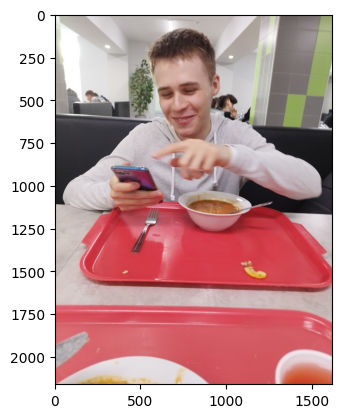

In [3]:
img = utils.load_image("belikov.jpg")
plt.imshow(img)
plt.show()

In [4]:
faces = detection.detect_faces(img)

## Без выравнивания

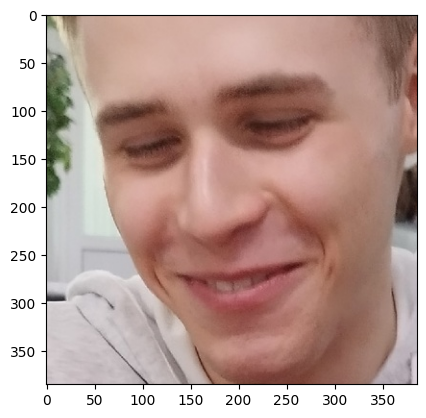

In [5]:
rect = faces[0]
ar = np.ascontiguousarray(img[rect.top(): rect.bottom(), rect.left(): rect.right()])
plt.imshow(ar)
plt.show()

## С выравниванием

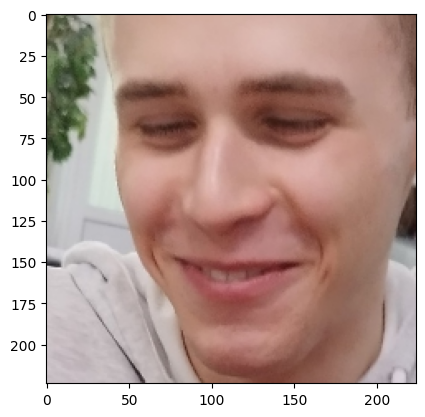

In [6]:
sp = dlib.shape_predictor('../utils/shape_predictor_5_face_landmarks.dat')

with_landmarks = dlib.full_object_detections()
for detection in faces:
    with_landmarks.append(sp(img, detection))

image = dlib.get_face_chip(img, with_landmarks[0], size=224)
plt.imshow(image)
plt.show()